# Graphics Testing

Notebook to test graphics during development.

Simulated TCLab


<IPython.core.display.Javascript object>


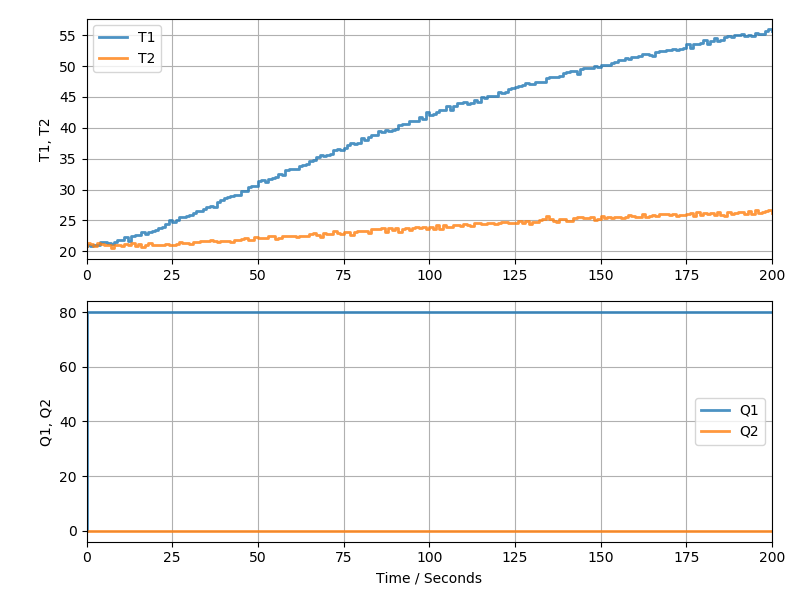

TCLab Model disconnected successfully.
17.741721153259277 seconds


In [1]:
%matplotlib notebook
from tclab import setup
from tclab import Historian, Plotter, clock
import time

tic = time.time()
lab = setup(connected=False, speedup=10)
with lab() as a:
    h = Historian(a.sources)
    p = Plotter(h, 200, layout=(('T1', 'T2'), ('Q1', 'Q2')))
    for t in clock(200):
        a.U1 = 80
        p.update(t)
toc = time.time()

print(toc-tic, 'seconds')

In [2]:
ax = p.axes[0]

In [3]:
ax.legend()

No handles with labels found to put in legend.


## Non-blocking Operation

In [1]:
import threading, time

next_call = time.time()

def foo():
  global next_call
  print(datetime.datetime.now())
  next_call = next_call+1
  threading.Timer( next_call - time.time(), foo ).start()

#foo()

def bar():
    clock.send(None)

def clock(tperiod):
    tstart = time.time()
    tfinish = tstart + tperiod
    t = 0
    while t + tstart < tfinish:
        z = yield t
        t += 1

def bar():
    clock.send(2)

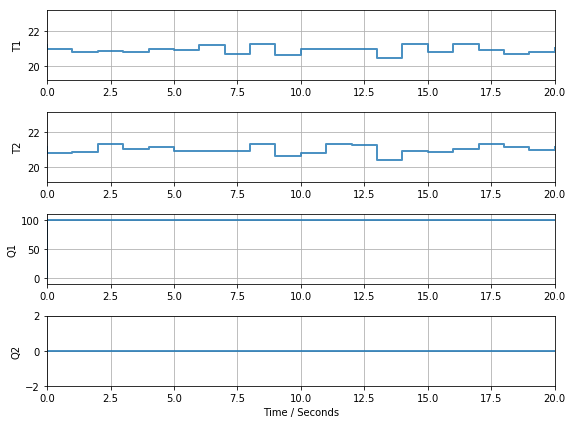

TCLab Model disconnected successfully.


In [3]:
from tclab import TCLabModel,  Historian, Plotter
import threading, time

tstep = 1
tperiod = 20

tstart = time.time()
tfinish = tstart + tperiod
tnext = tstart

a = TCLabModel()
h = Historian(a.sources)
p = Plotter(h,20)
a.U1 = 100


def tasks(tnext):
    global tnext, tfinish, tstep
    p.update(tnext-tstart)
    tnext = tnext + tstep
    if tnext <= tfinish:
        threading.Timer(tnext-time.time(), update).start()
    else:
        a.close()

update()

Simulated TCLab


<IPython.core.display.Javascript object>


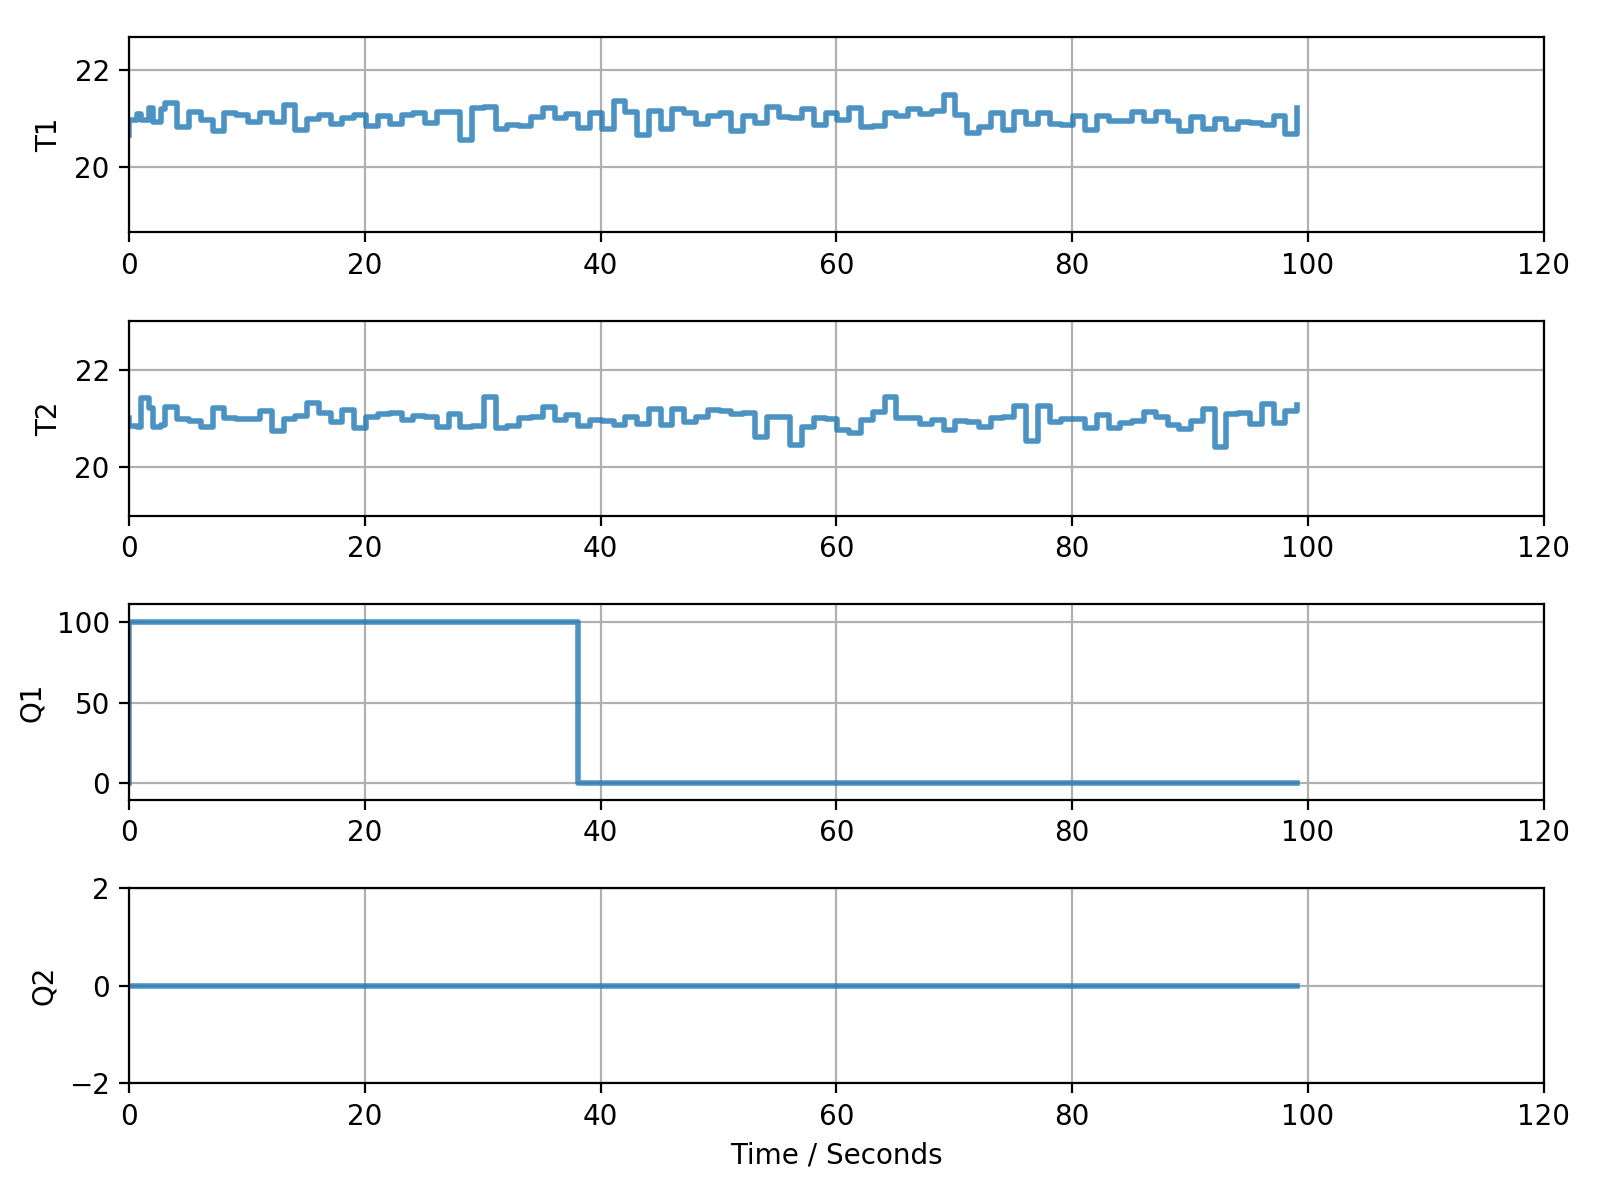

In [3]:
%matplotlib notebook

import time
from threading import Timer
from tclab import setup, Historian, Plotter

lab = setup(connected=False, speedup=1)
a = lab()
h = Historian(a.sources)
p = Plotter(h)

SP = 40

tstart = time.time()
def loop():
    PV = a.T1
    MV = 100 if PV < SP else 0
    a.U1 = MV
    p.update(time.time()-tstart)

for t in range(0,100):
    Timer(t, loop).start()
Timer(100,a.close).start()

In [4]:
SP = 20

In [12]:
import threading, time, datetime

def loop():
    yield
    print(datetime.datetime.now())
    threading.Timer(1000, lambda: next(loop_gen)).start()
    
loop_gen = loop()
next(loop_gen)


Hello 1.0035059452056885
Hello 2.0040109157562256


In [6]:
import asyncio

async def slow_op(n):
    await asyncio.sleep(n)
    print("Slow Op:", n)
    
async def main():
    await asyncio.wait([slow_op(3),slow_op(2),slow_op(1)])
    
loop = asyncio.get_event_loop()
loop.run_until_complete(main())

Slow Op: 1
Slow Op: 2
Slow Op: 3
